<a href="https://colab.research.google.com/github/bionic-brahma/Data_Science_Collection/blob/master/StockMarketPricePredictionUsingLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [338]:
import pandas_datareader as pdr

In [339]:
df= pdr.get_data_tiingo("AAPL", api_key="116c09cc46f5e12205ee698b8e2586d7974e50a1")

In [340]:
import pandas as pd

In [341]:
df.to_csv("AAPL.csv")

In [364]:
df= pd.read_csv("AAPL.csv")


In [365]:
df1=df.reset_index()["close"]

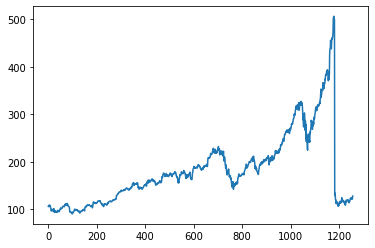

In [366]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [367]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))
df1= scaler.fit_transform(np.array(df1).reshape(-1,1))

In [346]:
training_size= int(len(df1)*0.70)
test_size= len(df1)-training_size
train_data, test_data= df1[0:training_size,:], df1[training_size:len(df1),:]

In [347]:
def create_dataset(dataset, time_step=1):
  dataX, dataY= [],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX), np.array(dataY)

In [348]:
time_step=150
Xtrain, ytrain=create_dataset(train_data,time_step)
xtest,ytest= create_dataset(test_data,time_step)

In [349]:
Xtrain= Xtrain.reshape(Xtrain.shape[0], Xtrain.shape[1],1)
xtest= xtest.reshape(xtest.shape[0], xtest.shape[1],1 )

In [350]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [351]:
model= Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(time_step,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [352]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 150, 50)           10400     
_________________________________________________________________
lstm_19 (LSTM)               (None, 150, 50)           20200     
_________________________________________________________________
lstm_20 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [353]:
model.fit(Xtrain,ytrain,validation_data=(xtest,ytest),epochs=150,batch_size=128,verbose=1)

Epoch 1/150
6/6 [==============================] - 1s 174ms/step - loss: 0.0114 - val_loss: 0.0356
Epoch 2/150
6/6 [==============================] - 0s 31ms/step - loss: 0.0026 - val_loss: 0.0689
Epoch 3/150
6/6 [==============================] - 0s 22ms/step - loss: 0.0024 - val_loss: 0.0403
Epoch 4/150
6/6 [==============================] - 0s 22ms/step - loss: 0.0015 - val_loss: 0.0352
Epoch 5/150
6/6 [==============================] - 0s 21ms/step - loss: 9.8885e-04 - val_loss: 0.0378
Epoch 6/150
6/6 [==============================] - 0s 21ms/step - loss: 6.9018e-04 - val_loss: 0.0291
Epoch 7/150
6/6 [==============================] - 0s 22ms/step - loss: 5.0967e-04 - val_loss: 0.0288
Epoch 8/150
6/6 [==============================] - 0s 22ms/step - loss: 4.4261e-04 - val_loss: 0.0296
Epoch 9/150
6/6 [==============================] - 0s 23ms/step - loss: 4.2603e-04 - val_loss: 0.0287
Epoch 10/150
6/6 [==============================] - 0s 23ms/step - loss: 4.1111e-04 - val_loss: 0

In [354]:
jsonmodel= model.to_json()

In [355]:
json_file= open("apple.json",'w')

In [356]:
json_file.write(jsonmodel)

3241

In [357]:
model.save_weights("apple.h5")
Xtrain.shape

(728, 150, 1)

In [358]:
train_predict=model.predict(Xtrain)
test_predict= model.predict(xtest)

In [359]:
train_predict= scaler.inverse_transform(train_predict)
test_predict= scaler.inverse_transform(test_predict)

In [360]:
import math
from sklearn.metrics import  mean_squared_error
math.sqrt(mean_squared_error(ytrain,train_predict))

166.61413816290707

In [361]:
math.sqrt(mean_squared_error(ytest,test_predict))

299.58129653786784

In [362]:
dig1= np.empty_like(df1)
dig1.fill(np.nan)
#print(len(train_predict))
dig1[time_step+1:len(train_predict)+time_step+1]= train_predict
#dig2= np.empty_like(df1)
#dig2.fill(np.nan)
print(len(test_predict)," ",len(dig2))
dig1[time_step+len(train_predict)+time_step+2:]= test_predict


227   1257


[array([[125.33532]], dtype=float32), array([[126.12791]], dtype=float32), array([[126.819954]], dtype=float32), array([[127.443756]], dtype=float32), array([[128.02715]], dtype=float32), array([[128.58891]], dtype=float32), array([[129.13997]], dtype=float32), array([[129.68602]], dtype=float32), array([[130.23]], dtype=float32), array([[130.77342]], dtype=float32), array([[131.31743]], dtype=float32), array([[131.86296]], dtype=float32), array([[132.41089]], dtype=float32), array([[132.96199]], dtype=float32), array([[133.51697]], dtype=float32), array([[134.07632]], dtype=float32), array([[134.64041]], dtype=float32), array([[135.20947]], dtype=float32), array([[135.7836]], dtype=float32), array([[136.36281]], dtype=float32), array([[136.94702]], dtype=float32), array([[137.5361]], dtype=float32), array([[138.12991]], dtype=float32), array([[138.72826]], dtype=float32), array([[139.33098]], dtype=float32), array([[139.9379]], dtype=float32), array([[140.54884]], dtype=float32), arra

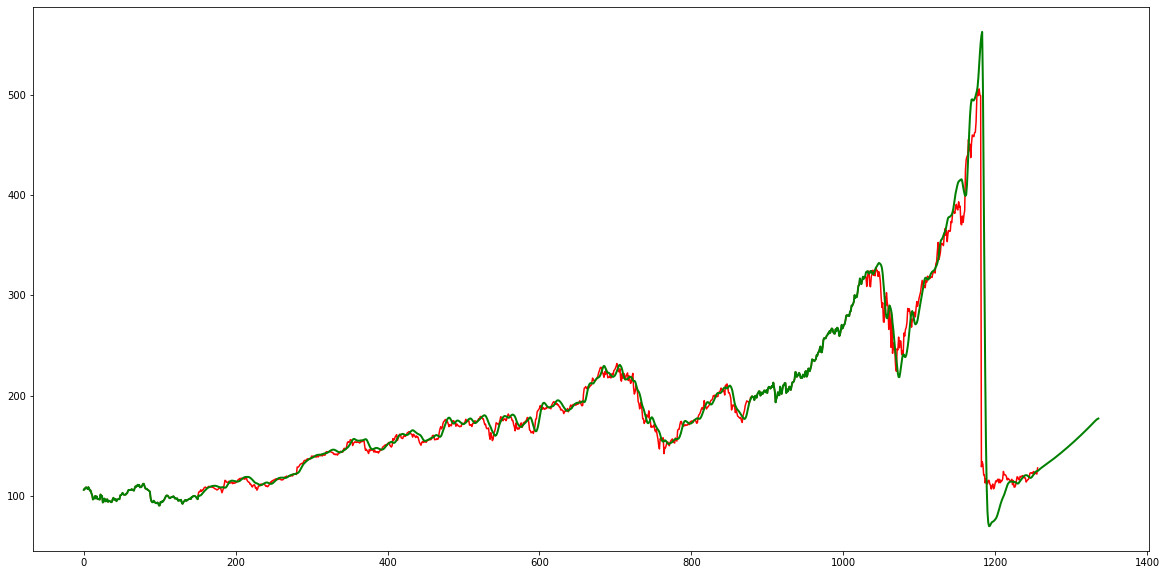

In [368]:
plt.figure(figsize=(20,10))
#plt.plot(dig1,'r*')
#plt.plot(dig2,'b')
df2= scaler.inverse_transform(df1)
plt.plot(df2,'r')

input_for_future_prediction= dig1.copy()
for i in range(len(input_for_future_prediction)):
  if np.isnan(input_for_future_prediction[i]):
    input_for_future_prediction[i]= df2[i]
#plt.plot(input_for_future_prediction,'g',linewidth=2)




t=0
prediction= list()
while t<80:
  X= input_for_future_prediction[len(input_for_future_prediction)-time_step:].copy()
 # print(X.shape)
  X= scaler.fit_transform(np.array(X))
  X= X.reshape(1,-1)
  X=X.reshape(1,time_step,1)
  Y= model.predict(np.array(X))

  #for i in range(len(X)-1):
  #  X[i]=X[i+1]  
  #X[len(X)-1]=Y

  Y_actual = scaler.inverse_transform(Y)
  prediction.append(Y_actual)
  #print(Y_actual)
  #input("Press Enter to continue...")
  input_for_future_prediction= np.array(input_for_future_prediction).tolist()
  input_for_future_prediction.append(Y_actual)
  input_for_future_prediction= np.array(input_for_future_prediction)
  t=t+1
print(prediction)
plt.plot(input_for_future_prediction,'g',linewidth=2)